In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score

In [20]:
data=pd.read_csv('/content/Essay Accepted.csv')

In [21]:
data.head(10)

,GPA,Test Score,Extracurricular Activities,Volunteer Hours,Recommendation Letters,Essay Score,Accepted
0,2.75,1374,5,16,2,9,No
1,3.90,1542,7,27,3,3,Yes
2,3.46,1040,4,29,1,9,No
3,3.20,1363,3,28,2,1,No
4,2.31,895,1,5,1,1,No
5,2.31,1533,5,34,1,4,No
6,2.12,1284,5,36,2,9,Yes
7,3.73,1206,0,23,1,6,Yes
8,3.20,1030,8,28,3,3,No
9,3.42,1548,5,30,1,1,Yes


In [22]:
data.isnull().sum()

,0
GPA,0
Test Score,0
Extracurricular Activities,0
Volunteer Hours,0
Recommendation Letters,0
Essay Score,0
Accepted,0


In [23]:
mn = StandardScaler()
list_num_data = ["GPA", "Test Score", "Extracurricular Activities", "Volunteer Hours", "Recommendation Letters", "Essay Score"]

for column in list_num_data:
    data[column] = mn.fit_transform(data[[column]])

In [24]:
le=LabelEncoder()
data['Accepted']=le.fit_transform(data['Accepted'])


In [25]:
data.describe()

,GPA,Test Score,Extracurricular Activities,Volunteer Hours,Recommendation Letters,Essay Score,Accepted
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.00000
mean,-1.172396e-16,-1.456613e-16,-1.421085e-17,-2.131628e-17,9.947598e-17,1.278977e-16,0.50000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.50025
min,-1.542014e+00,-2.034646e+00,-1.416707e+00,-1.912954e+00,-1.113603e+00,-1.649256e+00,0.00000
25%,-9.415284e-01,-9.517056e-01,-6.794149e-01,-6.766820e-01,-1.113603e+00,-9.487863e-01,0.00000
50%,9.240810e-03,9.951728e-02,-3.107687e-01,2.063690e-01,1.432853e-01,-2.483165e-01,0.50000
75%,8.766092e-01,8.834033e-01,7.951698e-01,8.245048e-01,1.400174e+00,1.152623e+00,1.00000
max,1.727297e+00,1.572136e+00,1.901108e+00,1.530946e+00,1.400174e+00,1.502858e+00,1.00000


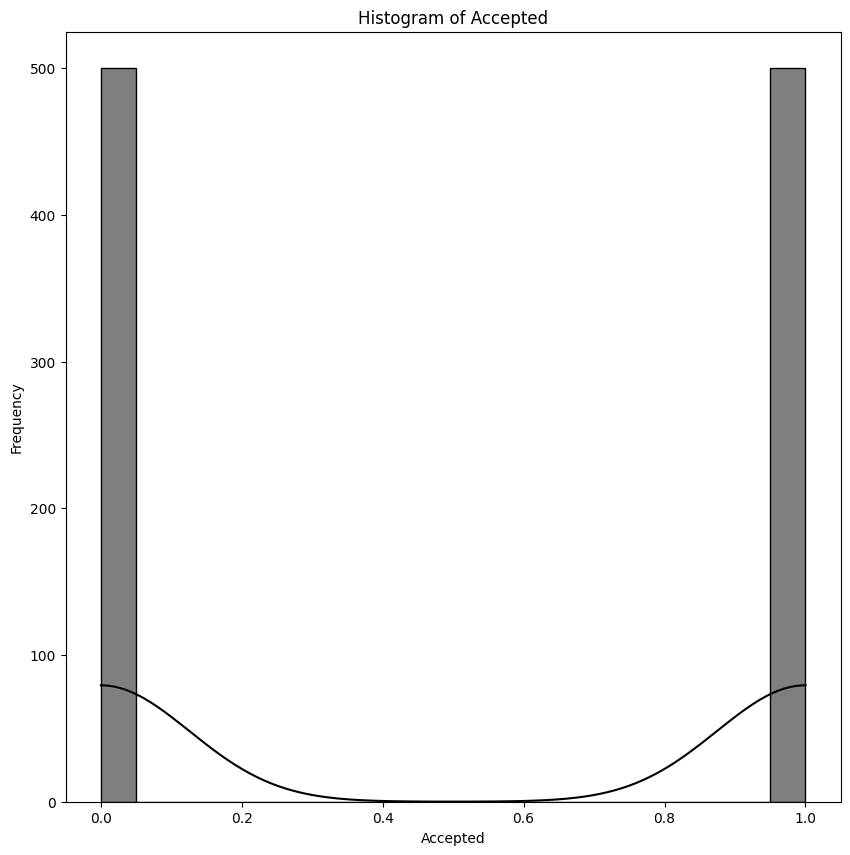

In [26]:
plt.figure(figsize=(10,10))
sns.histplot(data["Accepted"],kde=True,bins=20,color='Black')
plt.xlabel('Accepted')
plt.ylabel('Frequency')
plt.title('Histogram of Accepted')
plt.show()



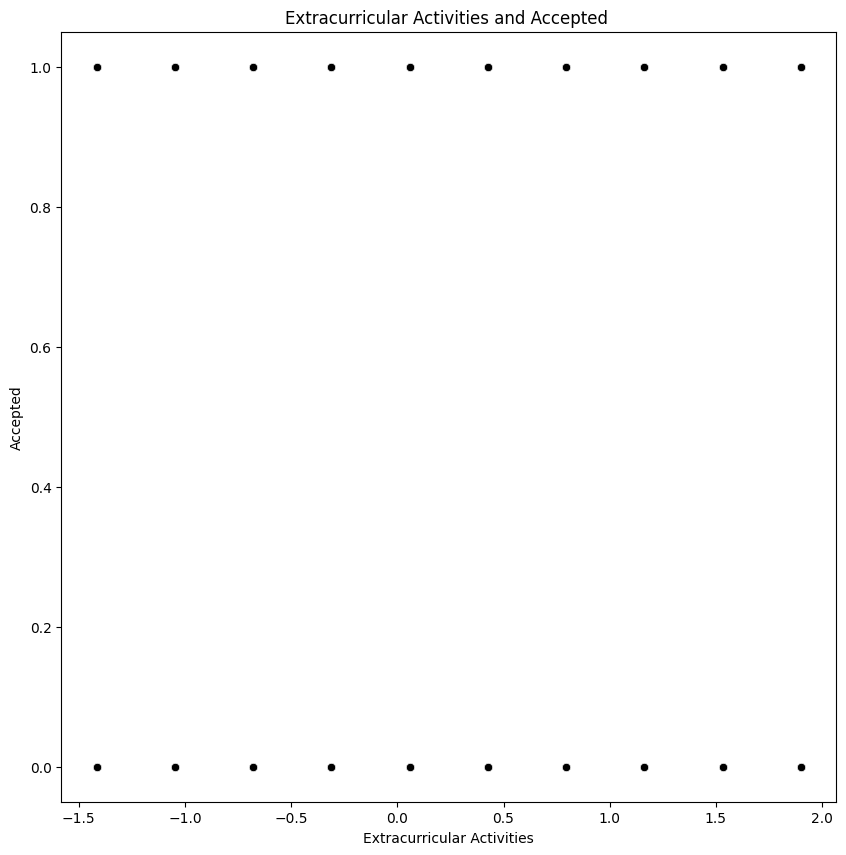

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data["Extracurricular Activities"],y=data["Accepted"],data=data,color='Black')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Accepted')
plt.title('Extracurricular Activities and Accepted ')
plt.show()


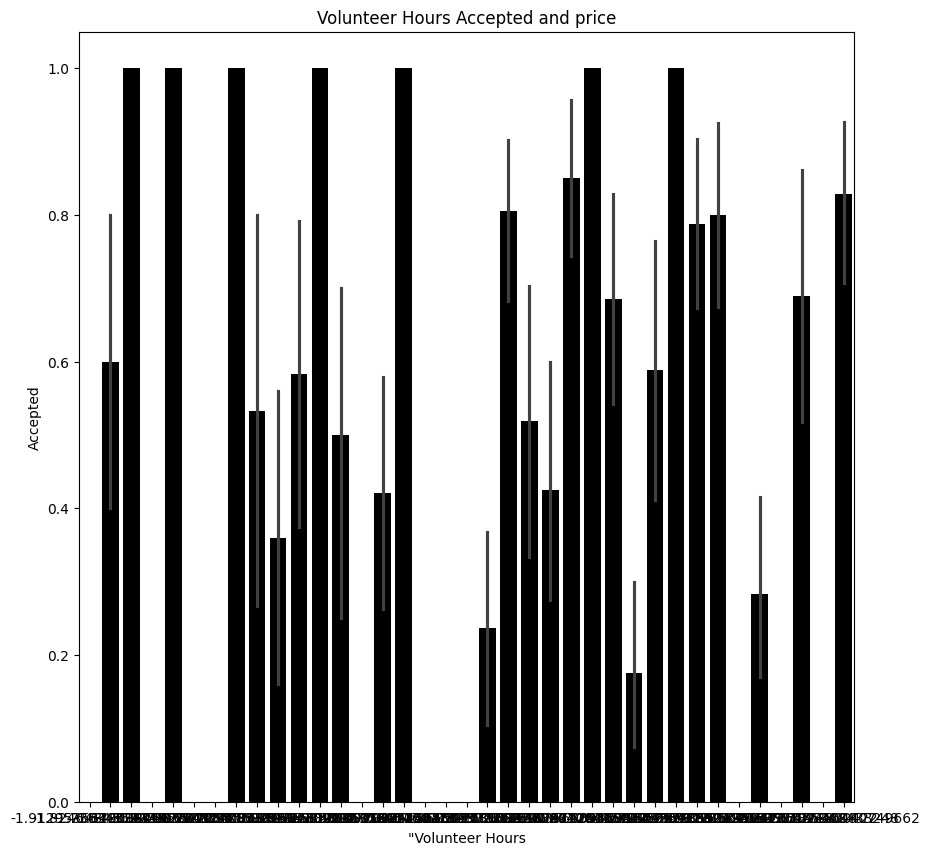

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(x=data["Volunteer Hours"],y=data["Accepted"],data=data,color='Black')
plt.xlabel('"Volunteer Hours')
plt.ylabel('Accepted')
plt.title('Volunteer Hours Accepted and price')
plt.show()


In [29]:
x=data.drop('Accepted',axis=1)
y=data['Accepted']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1000)

In [31]:
data

,GPA,Test Score,Extracurricular Activities,Volunteer Hours,Recommendation Letters,Essay Score,Accepted
0,-0.307682,0.561693,0.426524,-0.500072,0.143285,1.152623,0
1,1.610536,1.322923,1.163816,0.471284,1.400174,-0.948786,1
2,0.876609,-0.951706,0.057877,0.647895,-1.113603,1.152623,0
3,0.442925,0.511850,-0.310769,0.559589,0.143285,-1.649256,0
4,-1.041609,-1.608720,-1.048061,-1.471428,-1.113603,-1.649256,0
...,...,...,...,...,...,...,...
995,1.510455,1.055586,-1.416707,0.029759,1.400174,-1.649256,1
996,-0.591245,1.563073,-0.310769,0.736200,0.143285,-0.248317,1
997,1.610536,1.322923,1.163816,0.471284,1.400174,-0.948786,1
998,1.326974,0.520913,-0.679415,0.294674,-1.113603,1.152623,1


In [32]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [33]:
print("the accurce is:",dt.score(x_train,y_train))
print("the mse is:",dt.score(x_test,y_test))

the accurce is: 1.0
the mse is: 1.0


In [34]:
from sklearn.model_selection import GridSearchCV
dt_pram={'max_leaf_nodes':[1000,2000,3000,4000,5000,6000,7000,8000,9000,1000]}
GridSearch_model=GridSearchCV(dt,dt_pram,cv=5)
GridSearch_model.fit(x_train,y_train)
prdict=GridSearch_model.predict(x_test)

In [35]:
print("For highest accuracy:", GridSearch_model.best_params_)
print("For lowest mse:", GridSearch_model.best_score_)

For highest accuracy: {'max_leaf_nodes': 1000}
For lowest mse: 1.0


In [36]:

import gradio as gr
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = pd.read_csv('/content/Essay Accepted.csv')

mn = StandardScaler()
list_num_data = ["GPA", "Test Score", "Extracurricular Activities", "Volunteer Hours", "Recommendation Letters", "Essay Score"]
for column in list_num_data:
    data[column] = mn.fit_transform(data[[column]])
le = LabelEncoder()
data['Accepted'] = le.fit_transform(data['Accepted'])

x = data.drop('Accepted', axis=1)
y = data['Accepted']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1000)

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

def predict_acceptance(gpa, test_score, extracurricular, volunteer_hours, recommendation_letters, essay_score):
    input_data = pd.DataFrame({
        "GPA": [gpa],
        "Test Score": [test_score],
        "Extracurricular Activities": [extracurricular],
        "Volunteer Hours": [volunteer_hours],
        "Recommendation Letters": [recommendation_letters],
        "Essay Score": [essay_score]
    })
    for col in list_num_data:
        input_data[col] = mn.transform(input_data[[col]])

    prediction = dt.predict(input_data)[0]
    return prediction

iface = gr.Interface(
    fn=predict_acceptance,
    inputs=[
        gr.Number(label="GPA"),
        gr.Number(label="Test Score"),
        gr.Number(label="Extracurricular Activities"),
        gr.Number(label="Volunteer Hours"),
        gr.Number(label="Recommendation Letters"),
        gr.Number(label="Essay Score")
    ],
    outputs=gr.Number(label="Acceptance Probability"),
    title="Essay Acceptance Predictor",
    description="Enter student details to predict essay acceptance."
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2986689470e431915c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
